In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-data-set/matches.csv
/kaggle/input/ipl-data-set/teamwise_home_and_away.csv
/kaggle/input/ipl-data-set/deliveries.csv
/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv
/kaggle/input/ipl-data-set/teams.csv
/kaggle/input/ipl-data-set/Players.xlsx


In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 514.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [4]:
xl = pd.read_excel('/kaggle/input/ipl-data-set/Players.xlsx')
print(xl)
teams = pd.read_csv("/kaggle/input/ipl-data-set/teams.csv")
deliveries = pd.read_csv("/kaggle/input/ipl-data-set/deliveries.csv")
matches = pd.read_csv("/kaggle/input/ipl-data-set/matches.csv",parse_dates=['date'])
teamwise_home_and_away = pd.read_csv("/kaggle/input/ipl-data-set/teamwise_home_and_away.csv")
most_runs_average_strikerate = pd.read_csv("/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv")

        Player_Name        DOB Batting_Hand           Bowling_Skill   Country
0    A Ashish Reddy 1991-02-24   Right_Hand        Right-arm medium     India
1        A Chandila 1983-12-05   Right_Hand      Right-arm offbreak     India
2          A Chopra 1977-09-19   Right_Hand      Right-arm offbreak     India
3       A Choudhary        NaT   Right_hand    Left-arm fast-medium       NaN
4       A Dananjaya        NaT   Right_Hand      Right-arm offbreak       NaN
..              ...        ...          ...                     ...       ...
561     Younis Khan 1977-11-29   Right_Hand        Right-arm medium  Pakistan
562       YS Chahal 1990-07-23   Right_Hand         Legbreak googly     India
563    Yuvraj Singh 1981-12-12    Left_Hand  Slow left-arm orthodox     India
564     YV Takawale 1984-11-05   Right_Hand                     NaN     India
565          Z Khan 1978-10-07   Right_Hand    Left-arm fast-medium     India

[566 rows x 5 columns]


In [5]:
merge_df = pd.merge(deliveries,matches,left_on='match_id',right_on='id')

merge_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


Let's see how many teams are participated in IPL

In [6]:
print("No. of teams: ",teams['team1'].nunique())
teams['team1'].unique()

No. of teams:  15


array(['Pune Warriors', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', 'Gujarat Lions', 'Chennai Super Kings',
       'Rising Pune Supergiants', 'Delhi Daredevils', 'Deccan Chargers',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kings XI Punjab'], dtype=object)

In [7]:
matches.shape

(756, 18)

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [9]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


Repalcing the team names to thier respective short notations

In [10]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

Lets see who won the total matches till now

In [11]:
matches['winner'].value_counts()

MI                109
CSK               100
KKR                92
RCB                84
KXIP               82
RR                 75
DD                 67
SRH                58
DC                 29
RPS                15
GL                 13
PW                 12
Delhi Capitals     10
KTK                 6
Name: winner, dtype: int64

<AxesSubplot:>

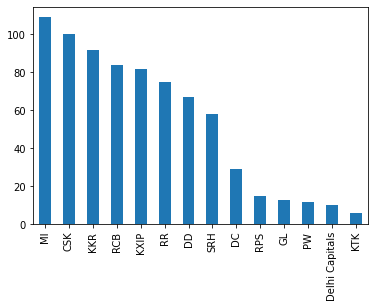

In [12]:
import matplotlib.pyplot as plt
matches['winner'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='toss_decision'>

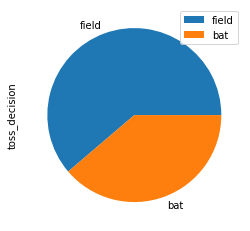

In [13]:
matches['toss_decision'].value_counts().plot(kind='pie',legend=True)

In [14]:
matches['team1'].value_counts()

MI                101
KXIP               91
CSK                89
RCB                85
KKR                83
DD                 72
RR                 67
SRH                63
DC                 43
PW                 20
RPS                15
GL                 14
KTK                 7
Delhi Capitals      6
Name: team1, dtype: int64

In [15]:
matches['team2'].value_counts()

RCB               95
KKR               95
DD                89
MI                86
KXIP              85
RR                80
CSK               75
SRH               45
DC                32
PW                26
GL                16
RPS               15
Delhi Capitals    10
KTK                7
Name: team2, dtype: int64

In [16]:
(matches['team1'].value_counts()+matches['team2'].value_counts()).sort_values(ascending=False)

MI                187
RCB               180
KKR               178
KXIP              176
CSK               164
DD                161
RR                147
SRH               108
DC                 75
PW                 46
GL                 30
RPS                30
Delhi Capitals     16
KTK                14
dtype: int64

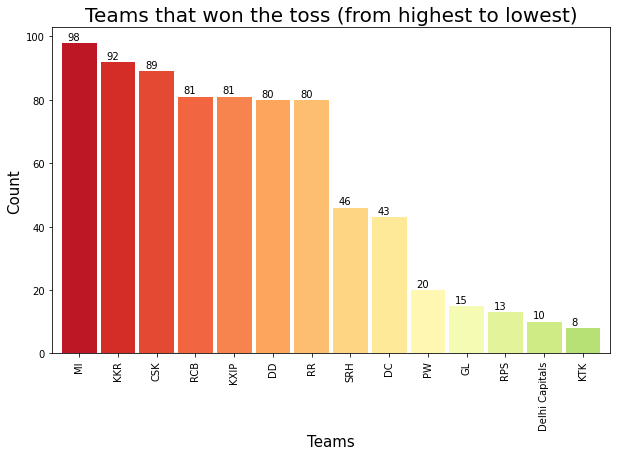

In [17]:
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Teams that won the toss (from highest to lowest)", fontsize=20)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

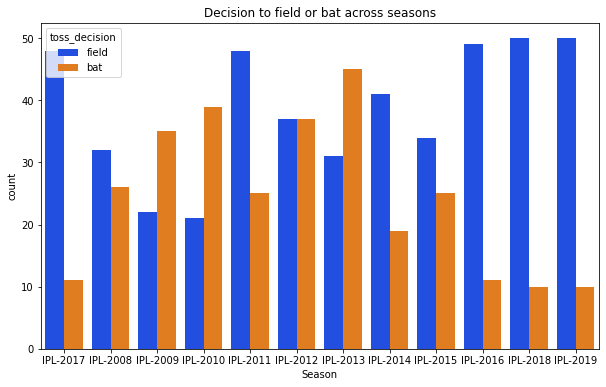

In [18]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Season',hue='toss_decision',data=matches ,palette=sns.color_palette('bright'))
plt.title("Decision to field or bat across seasons")
plt.show()

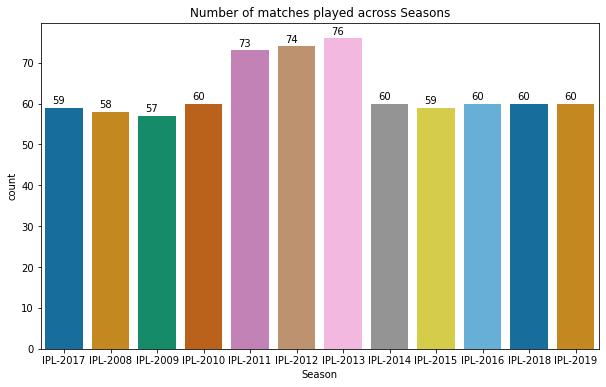

In [19]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='Season',data=matches,palette=sns.color_palette('colorblind')) 
#countplot automatically counts the frequency of an item
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Number of matches played across Seasons")
plt.show()

In [20]:
print("Total number of Cities played: ",matches['city'].nunique())
print("Total number of Venues played: ",matches['venue'].nunique())

Total number of Cities played:  32
Total number of Venues played:  41


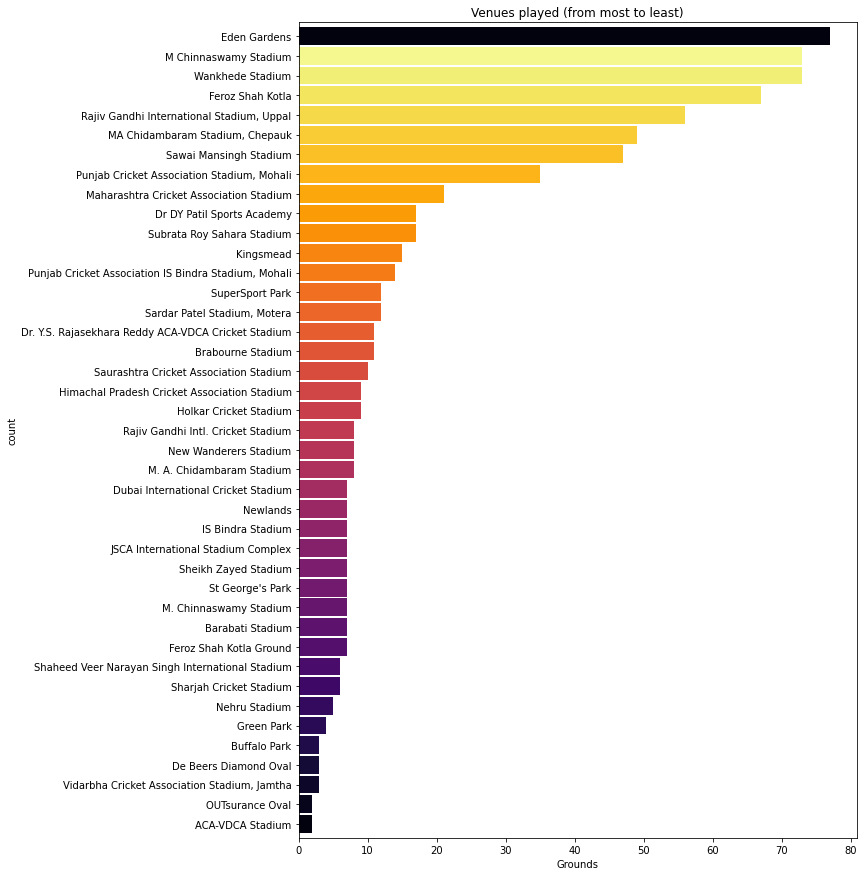

In [21]:
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.title("Venues played (from most to least)")
plt.show()

So,Eden Gardens is the venue that hosted most number of IPL matches

In [22]:
not_same = matches[matches['toss_winner'] != matches['winner']]
same = matches[matches['toss_winner'] == matches['winner']]
print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where toss winner is same as winner: ", round(same.shape[0]/matches.shape[0],2) * 100)
toss_winner = pd.DataFrame({'result':['Yes','No'],'per':[same.shape[0], not_same.shape[0]] })
fig = px.pie(toss_winner, values='per', names='result', color='result', title='Is Match winner same as toss winner?')
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Percentage of matches where toss winner is not same as winner:  48.0
Percentage of matches where toss winner is same as winner:  52.0


In [23]:
teamwise_home_and_away.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
print(teamwise_home_and_away.info())
teamwise_home_and_away.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes
None


,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,RPS,5,5,8,8,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326
2,CSK,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,SRH,30,28,63,45,47.619048,62.222222


In [24]:
teamwise_home_and_away['Win_per'] = (teamwise_home_and_away['home_wins'] + teamwise_home_and_away['away_wins'])/(teamwise_home_and_away['home_matches']+teamwise_home_and_away['away_matches'])*100
teamwise_home_and_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,Win_per
0,RPS,5,5,8,8,62.500000,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326,58.288770
2,CSK,51,49,89,75,57.303371,65.333333,60.975610
3,Delhi Capitals,3,7,6,10,50.000000,70.000000,62.500000
4,SRH,30,28,63,45,47.619048,62.222222,53.703704
5,RR,29,46,67,80,43.283582,57.500000,51.020408
6,DC,18,11,43,32,41.860465,34.375000,38.666667
7,KXIP,38,44,91,85,41.758242,51.764706,46.590909
8,RCB,35,49,85,95,41.176471,51.578947,46.666667
9,KKR,34,58,83,95,40.963855,61.052632,51.685393


In [25]:
teamwise_home_and_away.sort_values('Win_per',inplace=True,ascending=False)

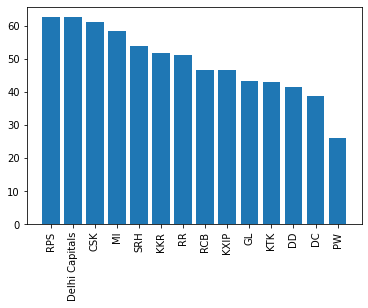

In [26]:
plt.bar(teamwise_home_and_away['team'],teamwise_home_and_away['Win_per'])
plt.xticks(rotation=90)
plt.show()

In [27]:
fig = go.Figure(data=[
    go.Bar(name='Home Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['home_win_percentage']),
    go.Bar(name='Away Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['away_win_percentage'])
])

fig.update_layout(barmode='group',title="Team wise - Home/Away wins")
fig.show()

In [28]:
most_runs_average_strikerate.info()
most_runs_average_strikerate.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [29]:
top_ten = most_runs_average_strikerate.head(10)


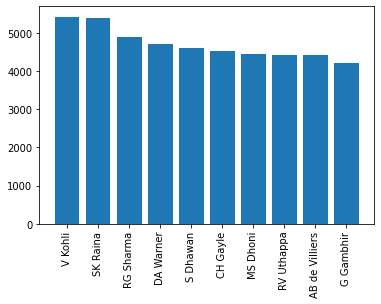

In [30]:
plt.bar('batsman','total_runs',data = top_ten)
plt.xticks(rotation=90)
plt.show()

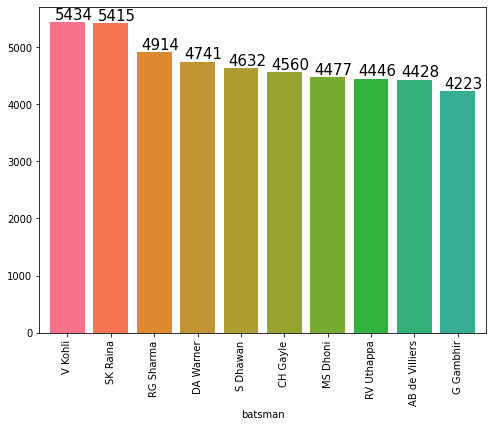

In [31]:
plt.subplots(figsize=(8,6))
b = deliveries.groupby(['batsman'])['batsman_runs'].sum()#.sort_values('batsman_runs')
b = b.sort_values(ascending=False)
b[100:200]

ax=b.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('husl',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

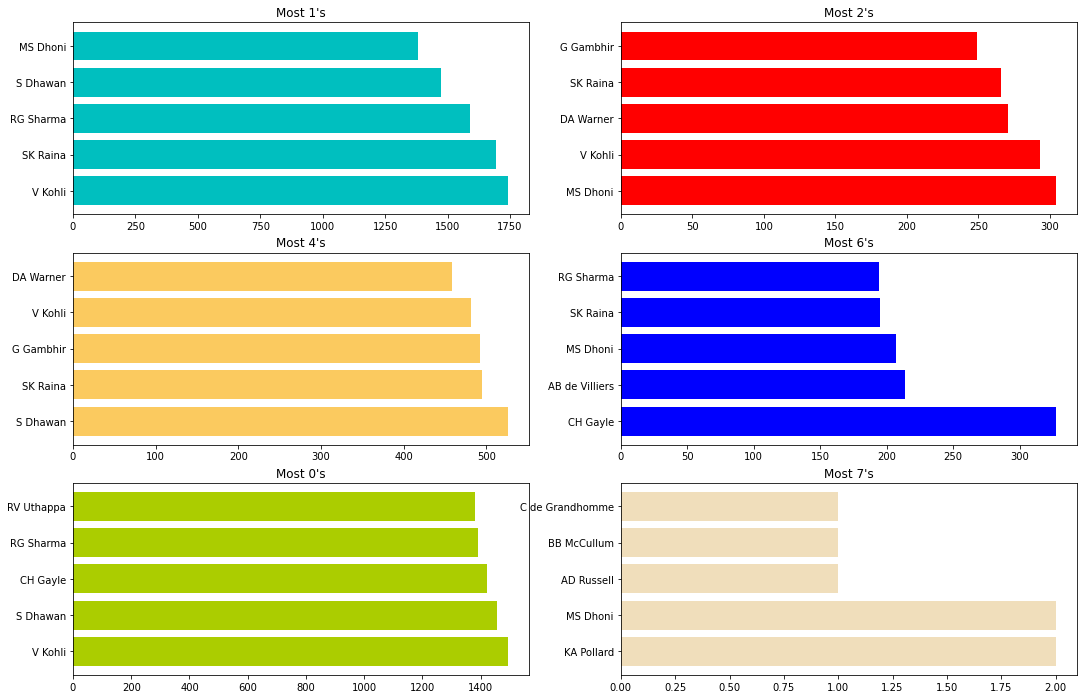

In [32]:
top_batsman = deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
top_batsman = top_batsman.pivot('batsman','batsman_runs','total_runs')

fig,ax=plt.subplots(3,2,figsize=(18,12))
top_batsman[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='c',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
top_batsman[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='r',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
top_batsman[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
top_batsman[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='b',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
top_batsman[0].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,0],color='#abcd00',width=0.8)
ax[2,0].set_title("Most 0's")
ax[2,0].set_ylabel('')
top_batsman[7].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,1],color='#f0debb',width=0.8)
ax[2,1].set_title("Most 7's")
ax[2,1].set_ylabel('')
plt.show()

In [33]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
1498,11338,1,KKR,MI,241
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
1426,11147,1,SRH,RCB,233
596,296,1,KXIP,RCB,232
1500,11339,1,SRH,KXIP,232


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Frequency')

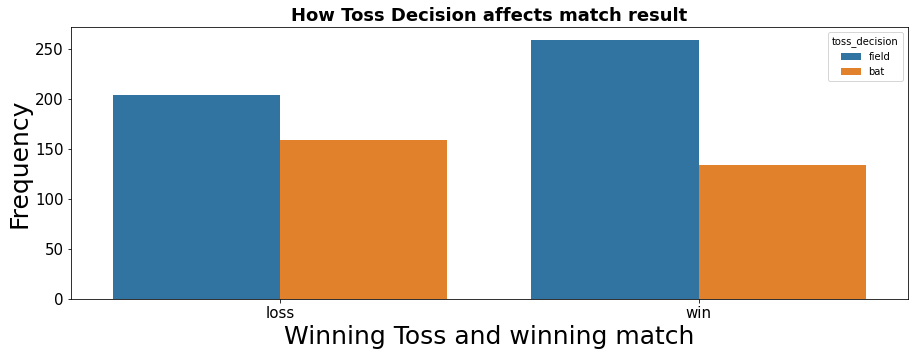

In [34]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'win','loss')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision',)
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

Text(0.5, 0, 'Players')

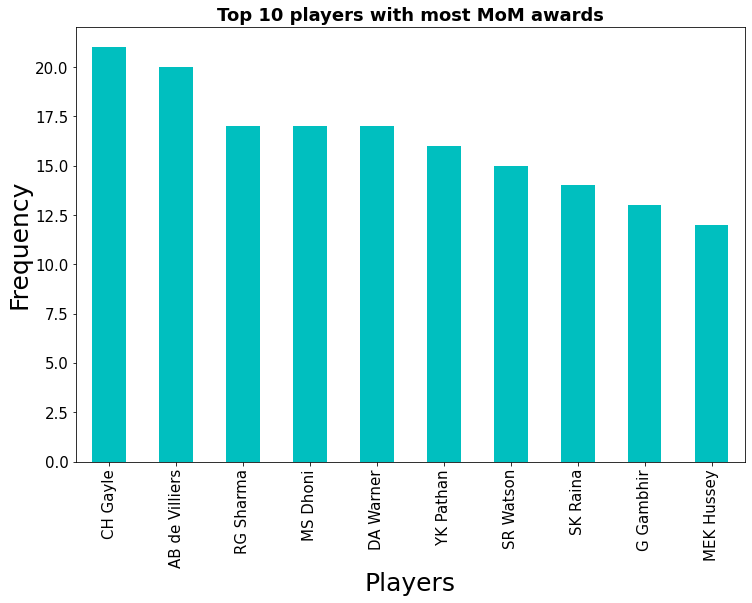

In [35]:
matches['player_of_match'].value_counts().head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='c')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

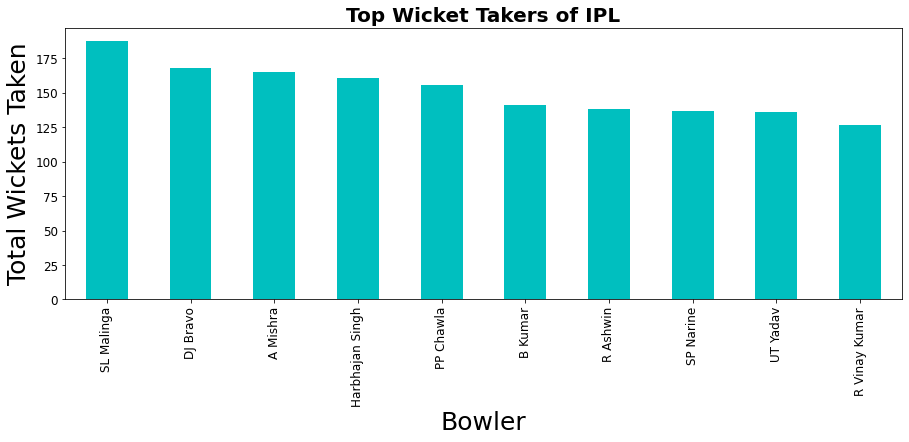

In [36]:
merge_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'c', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)